<a href="https://colab.research.google.com/github/alistechworld/Cardiovascular-Health-Analysis/blob/main/Cardiovascular_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

print(colored('\nAll libraries imported succesfully.', 'blue'))


All libraries imported succesfully.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cardiovascular_Disease_Dataset.csv to Cardiovascular_Disease_Dataset.csv


In [ ]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [ ]:
df.head().style.set_properties(**{'background-color':'blue','color':'white','border-color':'#8b8c8c'})

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.300000,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.700000,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.000000,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.200000,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.300000,3,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,5048704.412000,2895904.500488,103368.000000,2536439.500000,4952508.500000,7681877.000000,9990855.000000
age,1000.000000,49.242000,17.864730,20.000000,34.000000,49.000000,64.250000,80.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.980000,0.953157,0.000000,0.000000,1.000000,2.000000,3.000000
restingBP,1000.000000,151.747000,29.965228,94.000000,129.000000,147.000000,181.000000,200.000000
serumcholestrol,1000.000000,311.447000,132.443801,0.000000,235.750000,318.000000,404.250000,602.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.748000,0.770123,0.000000,0.000000,1.000000,1.000000,2.000000
maxheartrate,1000.000000,145.477000,34.190268,71.000000,119.750000,146.000000,175.000000,202.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Data Preprocessing

In [ ]:
df.isna().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [ ]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [ ]:
# Handling Missing Values

In [ ]:
df.isna().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [ ]:
# EDA

In [ ]:
# What is the age range of patients in the dataset?

age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


In [ ]:
# How many males and females are represented in the dataset?
gender_count = df['gender'].value_counts()
print(gender_count)

gender
1    765
0    235
Name: count, dtype: int64


In [ ]:
# What is the most common type of chest pain observed in the patients?
chest_pain_count = df['chestpain'].value_counts()
print(chest_pain_count)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


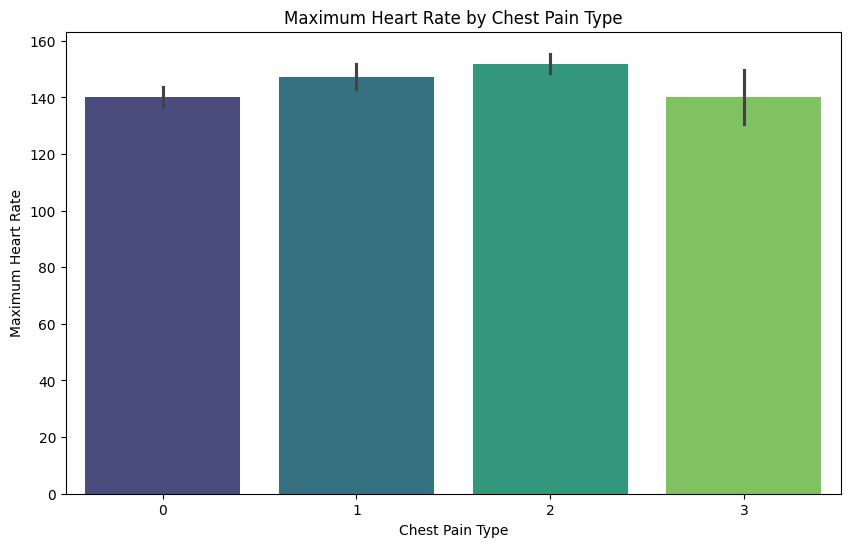

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [ ]:
# What is the average resting blood pressure among the patients?
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


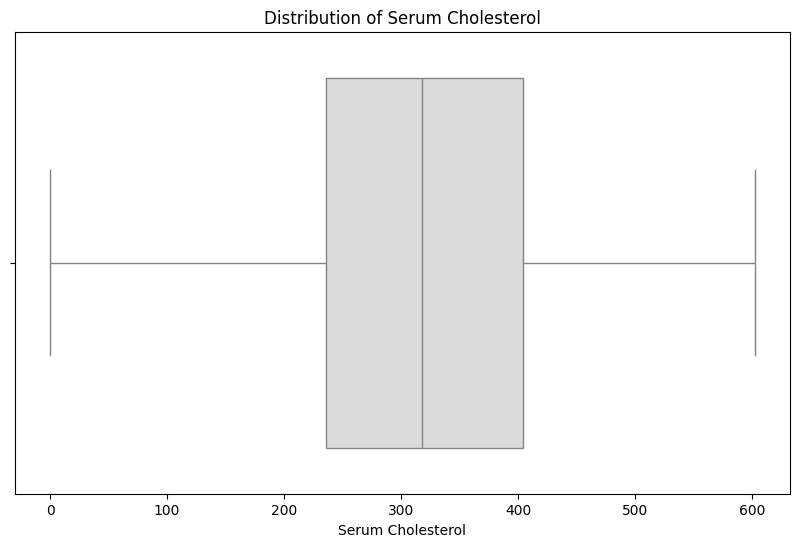

In [ ]:
# How does serum cholesterol vary across differenct patients?
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

In [ ]:
# What percentage of patients have fasting blood sugar greater than 120 mg/dl?
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum()/len(df) * 100)
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar}")

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.599999999999998


In [ ]:
# What are the predominant resting electocardiogram results in the dataset?

resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)

restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64


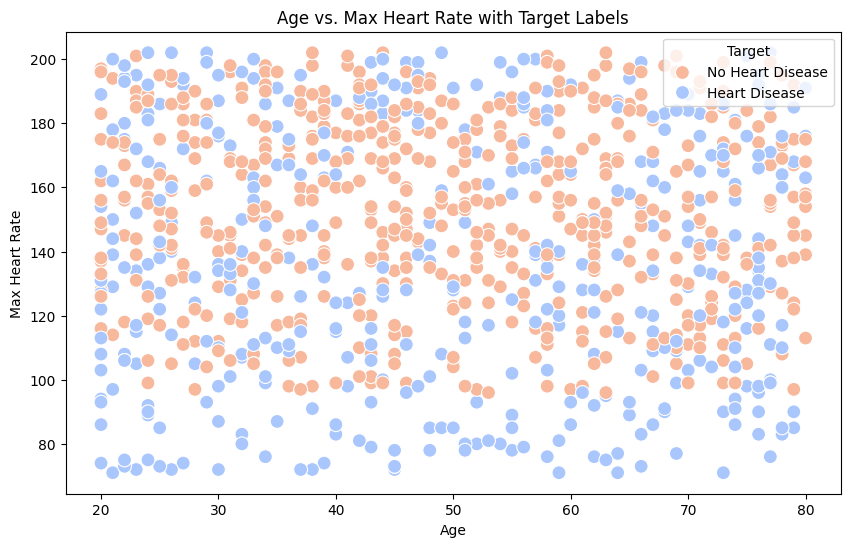

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='maxheartrate', data=df, hue='target', palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [ ]:
# What is the average maximum heart rate achieved by the patient on average?

average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate :" ,{average_max_heart_rate})


Average Maximum Heart Rate : {np.float64(145.477)}


In [ ]:
# How many patients experienced exercise-included angina?
exercies_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Included Angina: {exercies_angina_count}")

Number of Patients with Exercise-Included Angina: 498


In [ ]:
# What is the average oldpeak (ST depression induced by exericise relative to rest) among the patients?
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak:{average_oldpeak:.2f}")

Average Oldpeak:2.71


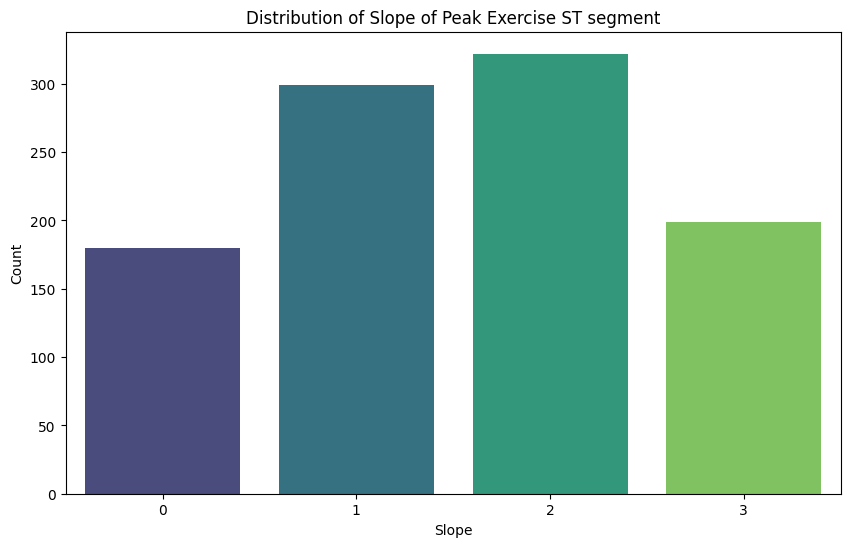

In [ ]:
# How is the slope of the peak exercise ST segment distributed in the dataset?
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

In [ ]:
# What is the range of the number of major vessels in the patients?
vessels_range = f"Number of Major Vessels Range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}"
print(vessels_range)

Number of Major Vessels Range: 0 - 3


In [ ]:
# What percentage of patients in the dataset have heart disease(target=1)?
percentage_heart_disease = (df['target'].sum() / len(df) * 100)
print(f'Percentage of Patients wiht Heart Disease: {percentage_heart_disease:.2f}%')

Percentage of Patients wiht Heart Disease: 58.00%


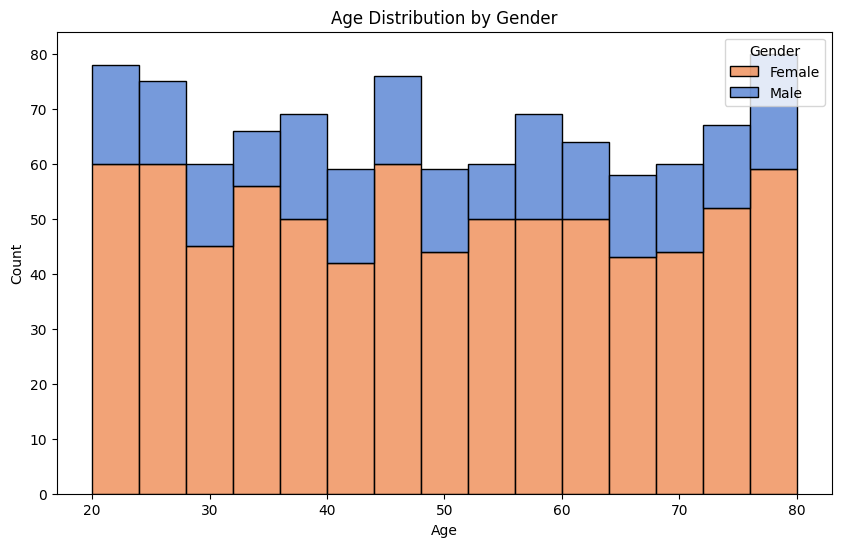

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [ ]:
# Can you identify the patient with the highest age in the dataset?
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient: \n {oldest_patient}")

Details of the Oldest Patient: 
 patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


In [ ]:
# Who is the patient with the lowest resting blood pressure ?
lowest_bp_patient = df.loc[df['restingBP'].idxmin()]
print(f"Details of the Patient with the lowest Resting Blood Pressure: \n {lowest_bp_patient}")

Details of the Patient with the lowest Resting Blood Pressure: 
 patientid            119250.0
age                      40.0
gender                    1.0
chestpain                 0.0
restingBP                94.0
serumcholestrol         229.0
fastingbloodsugar         0.0
restingrelectro           1.0
maxheartrate            115.0
exerciseangia             0.0
oldpeak                   3.7
slope                     1.0
noofmajorvessels          1.0
target                    0.0
Name: 1, dtype: float64


In [ ]:
# What is the correlation between age and maximum heart rate?
correlation_age_maxheartrate = df['age'].corr(df['maxheartrate'])
print(f"Correlation between Age and Maximum Heart Rate: {correlation_age_maxheartrate:.2f}")

Correlation between Age and Maximum Heart Rate: -0.04


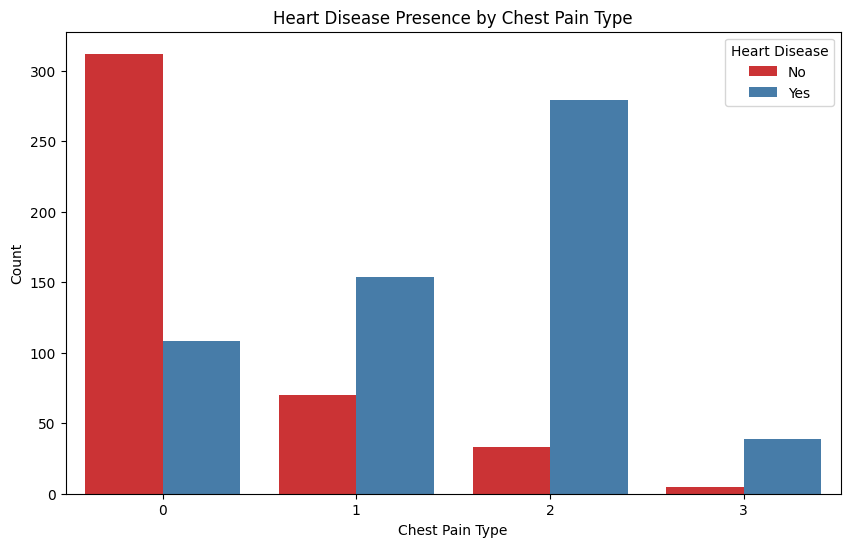

In [ ]:
# Is there a relationship between chest pain type and the presence of heart disease?
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

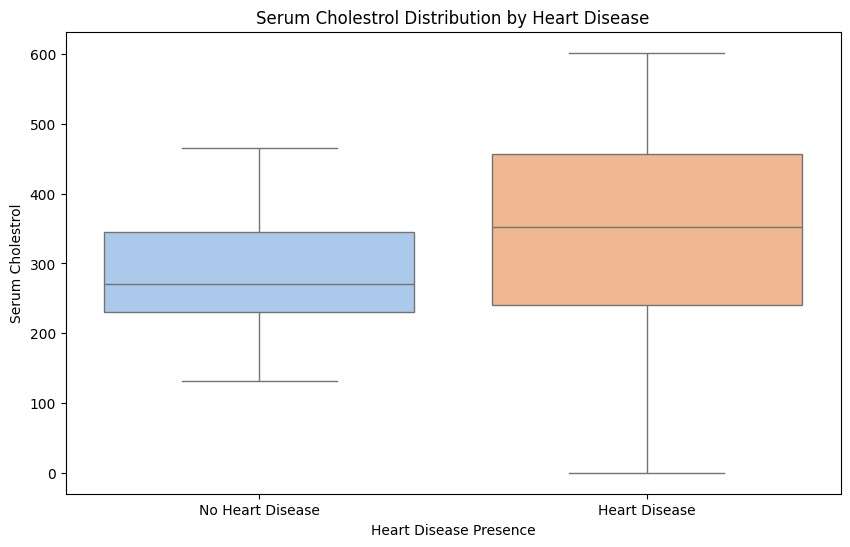

In [ ]:
# How does serum cholestrol differ between patients with and without heart disease?

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholestrol Distribution by Heart Disease')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholestrol')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


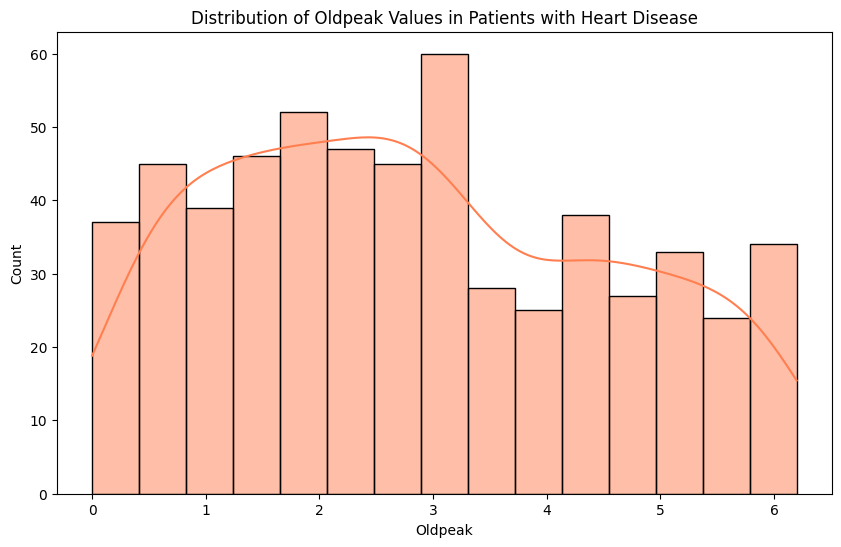

In [ ]:
# What is the distribution of oldpeak values for patients with heart disease?

plt.figure(figsize=(10, 6))
sns.histplot(x='oldpeak', data=df[df['target'] == 1], bins=15, kde=True, color='coral')
plt.title('Distribution of Oldpeak Values in Patients with Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

In [ ]:
# How many patients have all three major vessels showing defects?

defects_count = len(df[df['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels:{defects_count}")

Number of Patients with Defects in All Three Major Vessels:116


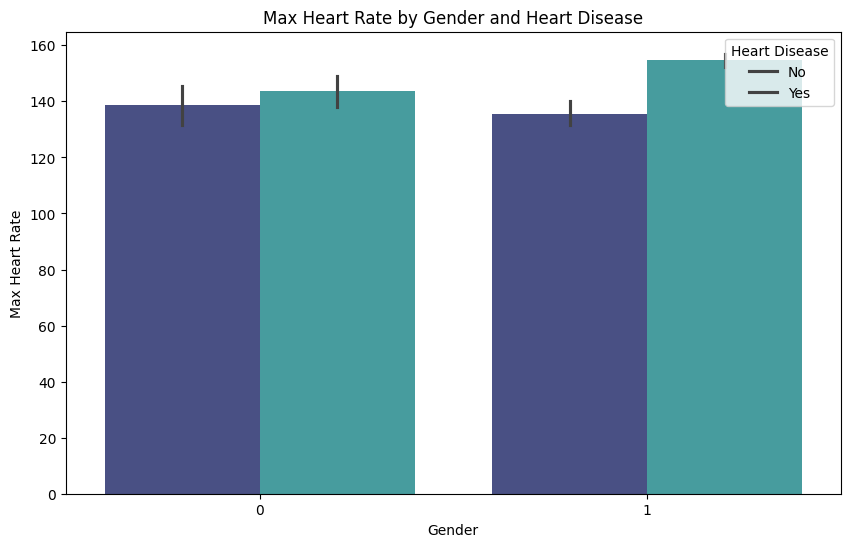

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='maxheartrate', hue='target', data=df, palette='mako')
plt.title('Max Heart Rate by Gender and Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [ ]:
# Target Categories

In [ ]:
# Target Classes:
df.target.unique()

array([1, 0])

In [ ]:
df = df.replace({'target':{
    0: 'Absence of Heart Disease',
    1: 'Presence of Heart Disease'
}})

In [ ]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,Presence of Heart Disease
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,Absence of Heart Disease
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,Absence of Heart Disease
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,Presence of Heart Disease
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,Presence of Heart Disease


In [ ]:
# Normalization

In [ ]:
# Create X from DataFrame and y as Target
X_disease = df.drop(columns='target')
y = df.target

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe().T.style.background_gradient(axis=0, cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,0.500161,0.292886,0.000000,0.246076,0.490432,0.766475,1.000000
age,1000.000000,0.487367,0.297746,0.000000,0.233333,0.483333,0.737500,1.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.326667,0.317719,0.000000,0.000000,0.333333,0.666667,1.000000
restingBP,1000.000000,0.544783,0.282691,0.000000,0.330189,0.500000,0.820755,1.000000
serumcholestrol,1000.000000,0.517354,0.220006,0.000000,0.391611,0.528239,0.671512,1.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.374000,0.385061,0.000000,0.000000,0.500000,0.500000,1.000000
maxheartrate,1000.000000,0.568527,0.260994,0.000000,0.372137,0.572519,0.793893,1.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Modeling

In [ ]:
# Define a function to ploting Confusion matrix

def plot_confusion_matrix(y_test, y_prediction):
  '''Plotting Confusion Matrix'''
  cm = metrics.confusion_matrix(y_test, y_prediction)
  ax = plt.subplot()
  ax = sns.heatmap(cm, annot=True, fmt='', cmap='plasma')
  ax.set_xlabel('Predicted labels', fontsize=18)
  ax.set_ylabel('True labels', fontsize=18)
  ax.set_title('Confusion Matrix', fontsize=25)
  ax.xaxis.set_ticklabels(['Absence of Heart Disease', 'Presence of Heart Disease'])
  ax.yaxis.set_ticklabels(['Absence of Heart Disease', 'Presence of Heart Disease'])
  plt.show()

In [ ]:
# Define a function to plotting Classification report
def clfr_plot(y_test, y_pred):
  '''Plotting Classification Report'''
  cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
  cr.drop(columns='support', inplace=True)
  sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()




In [ ]:
def clf_plot(y_pred):
  '''
  1) Ploting Confusion Matrix
  2) Ploting Classification Report
  '''
  cm = metrics.confusion_matrix(y_test, y_pred)
  cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
  cr.drop(columns='support', inplace=True)

  fig, ax = plt.subplots(1, 2, figsize=(15, 5))

  # Left : Confusion Matrix
  ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap='plasma', ax=ax[0])
  ax[0].set_xlabel('Predicted labels', fontsize=18)
  ax[0].set_ylabel('True labels', fontsize=18)
  ax[0].set_title('Confusion Matrix', fontsize=18)
  ax[0].xaxis.set_ticklabels(['Absence of Heart Disease', 'Presence of Heart Disease'])

  # Right: Classification Report
  ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
  ax[1].xaxis.tick_top()
  ax[1].set_title('Classification Report', fontsize=25)
  plt.show()

In [ ]:
df.target.value_counts()

,count
target,
Presence of Heart Disease,580
Absence of Heart Disease,420


In [ ]:
# Split Datafrme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_estimators': [50, 150, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2']
}

# Base model
rf = RandomForestClassifier(n_jobs=-1)

# GridSearchCV with 20-fold CV
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters)
rf_cv.fit(X_train, y_train)

# Best params and best CV score
print('Tuned Hyper Parameters:', rf_cv.best_params_)
print('Cross-Validation Score (Train):', rf_cv.best_score_)

# Test accuracy on unseen data
y_pred_test = rf_cv.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print('Test Accuracy:', test_acc)

# Compare CV vs Test Accuracy
print("\n--- Performance Comparison ---")
print(f"CV Score (Train folds): {rf_cv.best_score_:.4f}")
print(f"Test Accuracy        : {test_acc:.4f}")

# Overfitting check
if rf_cv.best_score_ - test_acc > 0.05:
    print("\n⚠️ Possible Overfitting: CV score is significantly higher than Test accuracy.")
else:
    print("\n✅ Model seems to generalize well (No major overfitting detected).")


Tuned Hyper Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500}
Cross-Validation Score (Train): 0.9774182076813656
Test Accuracy: 0.98

--- Performance Comparison ---
CV Score (Train folds): 0.9774
Test Accuracy        : 0.9800

✅ Model seems to generalize well (No major overfitting detected).


In [ ]:
import pickle

# Save trained best estimator
with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(rf_cv.best_estimator_, f)

print("✅ Model saved as heart_disease_model.pkl")


✅ Model saved as heart_disease_model.pkl


In [ ]:
import pickle
import pandas as pd

# Load model
with open("heart_disease_model.pkl", "rb") as f:
    model = pickle.load(f)

# Low-risk sample
new_data = pd.DataFrame([{
    'patientid': 119251,
    'age': 35,
    'gender': 1,  # Male
    'chestpain': 0,
    'restingBP': 120,
    'serumcholestrol': 180,
    'fastingbloodsugar': 0,
    'restingrelectro': 0,
    'maxheartrate': 170,
    'exerciseangia': 0,
    'oldpeak': 0.0,
    'slope': 2,
    'noofmajorvessels': 0
}])

# Predict
prediction = model.predict(new_data)

label_map = {0: "Presence of Heart Disease", 1: "Absence of Heart Disease"}
print("Prediction:", prediction[0])


Prediction: Presence of Heart Disease


In [ ]:
import pandas as pd

# y_train ya full y dataset ka check karna
print(y.value_counts())
print("\nPercentage distribution:")
print(y.value_counts(normalize=True) * 100)


target
Presence of Heart Disease    580
Absence of Heart Disease     420
Name: count, dtype: int64

Percentage distribution:
target
Presence of Heart Disease    58.0
Absence of Heart Disease     42.0
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Test set predictions
y_pred_test = rf_cv.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=["Presence of Heart Disease", "Absence of Heart Disease"])
cm_df = pd.DataFrame(cm,
                     index=["Actual Presence", "Actual Absence"],
                     columns=["Predicted Presence", "Predicted Absence"])

print("Confusion Matrix:\n", cm_df)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, target_names=["Presence of Heart Disease", "Absence of Heart Disease"]))


Confusion Matrix:
                  Predicted Presence  Predicted Absence
Actual Presence                 131                  1
Actual Absence                    4                114

Classification Report:
                            precision    recall  f1-score   support

Presence of Heart Disease       0.99      0.97      0.98       118
 Absence of Heart Disease       0.97      0.99      0.98       132

                 accuracy                           0.98       250
                macro avg       0.98      0.98      0.98       250
             weighted avg       0.98      0.98      0.98       250



In [ ]:
import pandas as pd

# Find a row from test data where actual label = Absence
absence_index = y_test[y_test == "Absence of Heart Disease"].index[0]
absence_sample = X_test.loc[absence_index:absence_index]

# Model prediction
pred = rf_cv.best_estimator_.predict(absence_sample)

print("Actual label   :", y_test.loc[absence_index])
print("Model predicts :", pred[0])

# Show the sample data
print("\nSample input row:")
print(absence_sample)


Actual label   : Absence of Heart Disease
Model predicts : Absence of Heart Disease

Sample input row:
     patientid   age  gender  chestpain  restingBP  serumcholestrol  \
553   0.552345  0.45     1.0        0.0   0.575472         0.584718   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
553                0.0              0.0      0.977099            1.0   

      oldpeak  slope  noofmajorvessels  
553  0.177419    0.0               0.0  


In [ ]:
import pickle
from sklearn.preprocessing import MinMaxScaler

# Example: Scaling before training
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with scaled data
rf = RandomForestClassifier(**rf_cv.best_params_)
rf.fit(X_train_scaled, y_train)

# Save model and scaler together
with open("heart_model.pkl", "wb") as f:
    pickle.dump({"model": rf, "scaler": scaler}, f)


In [ ]:
import pandas as pd
import pickle

# Load model & scaler
with open("heart_model.pkl", "rb") as f:
    bundle = pickle.load(f)

model = bundle["model"]
scaler = bundle["scaler"]

# Your given row (raw values)
new_data = pd.DataFrame([{
    "patientid": 119250,
    "age": 40,
    "gender": 1,
    "chestpain": 0,
    "restingBP": 94,
    "serumcholestrol": 229,
    "fastingbloodsugar": 0,
    "restingrelectro": 1,
    "maxheartrate": 115,
    "exerciseangia": 0,
    "oldpeak": 3.7,
    "slope": 1,
    "noofmajorvessels": 1
}])

# Scale before prediction
new_data_scaled = scaler.transform(new_data)

# Predict
pred = model.predict(new_data_scaled)
print("Prediction:", pred[0])


Prediction: Presence of Heart Disease


In [ ]:
new_data = pd.DataFrame([{
    "patientid": 119250,
    "age": 40,
    "gender": 1,
    "chestpain": 0,
    "restingBP": 120,         # increased from 94 to normal range
    "serumcholestrol": 200,   # moderate
    "fastingbloodsugar": 0,
    "restingrelectro": 1,
    "maxheartrate": 170,      # high, good sign
    "exerciseangia": 0,
    "oldpeak": 0.2,           # very low
    "slope": 1,
    "noofmajorvessels": 0     # healthy
}])

# Scale & predict
new_data_scaled = scaler.transform(new_data)
pred = model.predict(new_data_scaled)
print("Prediction:", pred[0])


Prediction: Presence of Heart Disease


In [ ]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score:', rf_score)

RandomForestClassifier score: 0.98


In [ ]:
y_test.value_counts()

,count
target,
Presence of Heart Disease,132
Absence of Heart Disease,118


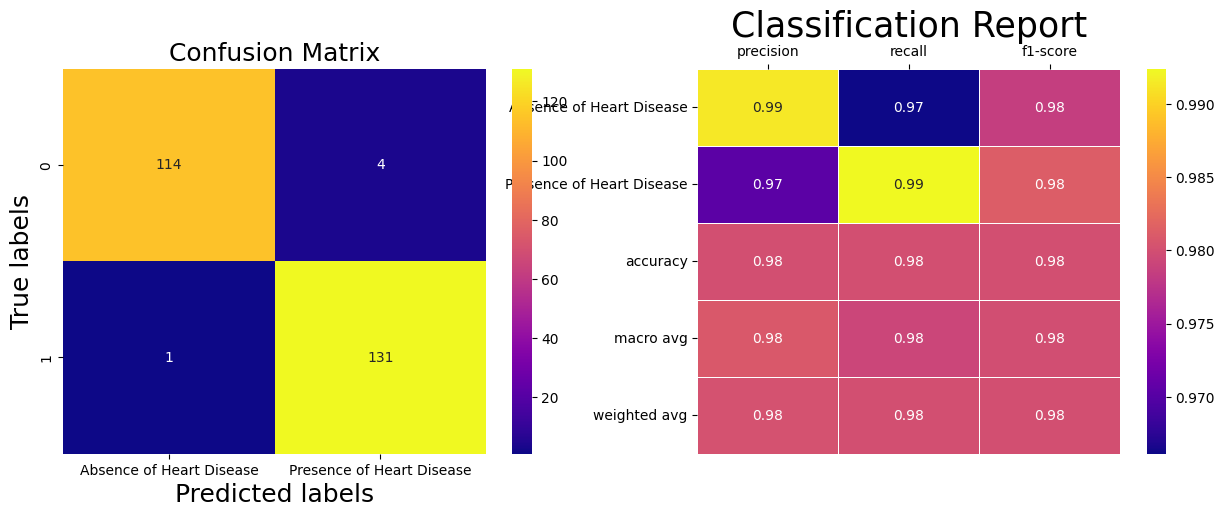

In [ ]:
clf_plot(y_pred_rf)

In [ ]:
# LogisticRegression

In [ ]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight': ['balanced'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters:', lr_cv.best_params_)
print('Accuracy:', lr_cv.best_score_ )

Tuned hyper parameters: {'C': 10, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Accuracy: 0.96


In [ ]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)
lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score:', lr_score)

LogisticRegression score: 0.976


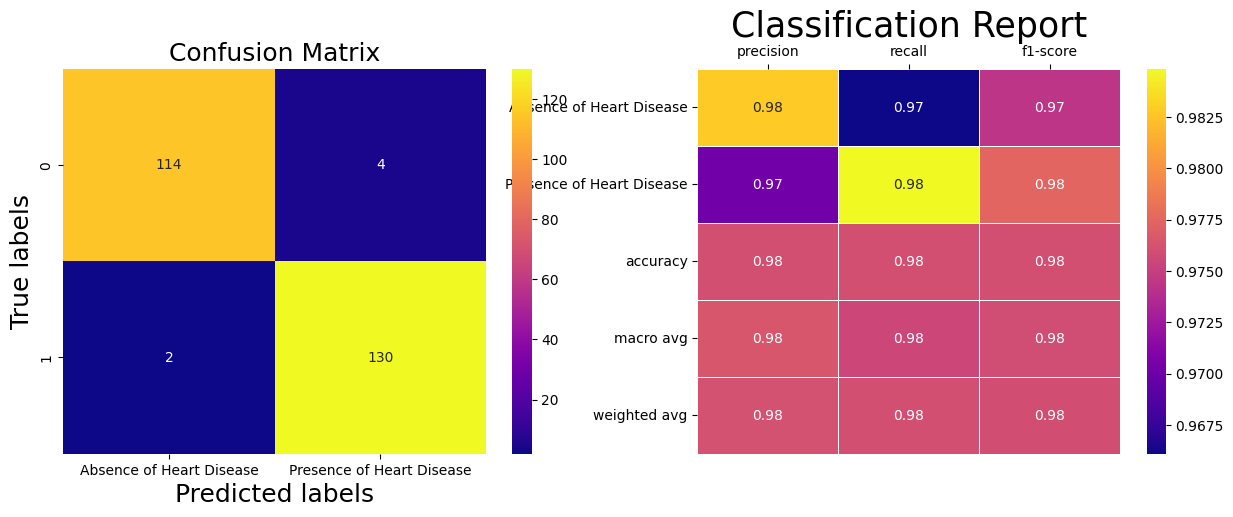

In [ ]:
clf_plot(y_pred_lr)

In [ ]:
# SVC

In [ ]:
# Dictionary to define parameters to test in algorithm
parameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
}

svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters:', svc_cv.best_params_)
print('Accuracy:', svc_cv.best_score_)

Tuned hyper parameters: {'C': 10, 'gamma': 0.1}
Accuracy: 0.9626666666666667


In [ ]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_svc = svc.predict(X_test)
svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score', svc_score)

SVC Score 0.968


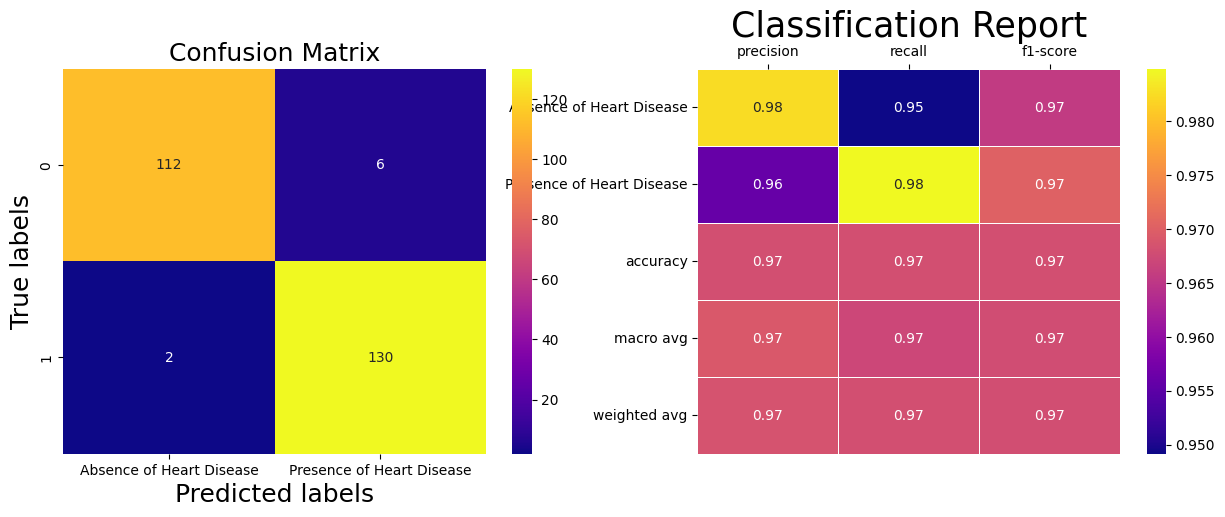

In [ ]:
clf_plot(y_pred_svc)

In [ ]:
# Decision Tree Classifier

In [ ]:
# Dictionary to define parameters to test in algorithm
parameters={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(np.arange(4, 30, 1))


}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters:', tree_cv.best_params_)
print('Accuracy:', tree_cv.best_score_)

Tuned hyper parameters: {'criterion': 'entropy', 'max_depth': np.int64(24), 'splitter': 'random'}
Accuracy: 0.9706666666666667


In [ ]:
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_tree = tree.predict(X_test)
tree_score = round(tree.score(X_test, y_test), 3)
print('Decision Tree Classifier Score:', tree_score)

Decision Tree Classifier Score: 0.96


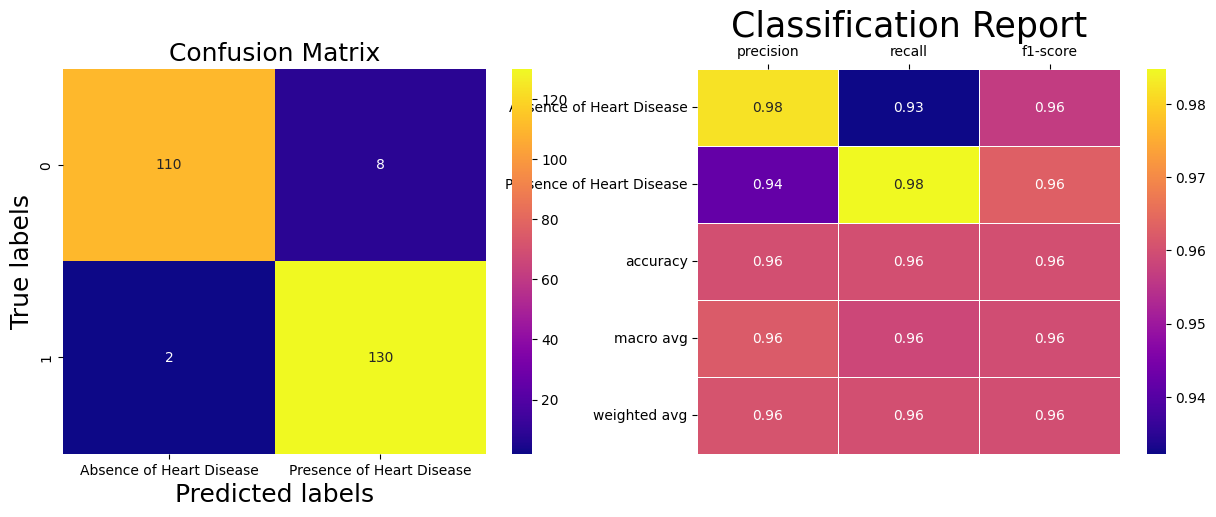

In [ ]:
clf_plot(y_pred_tree)

In [ ]:
# KNeighborsClassifier


In [ ]:


# Dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)


Tuned hyper parameters :  {'n_neighbors': np.int64(7), 'p': 1, 'weights': 'distance'}
accuracy :  0.9479999999999998


In [ ]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.96


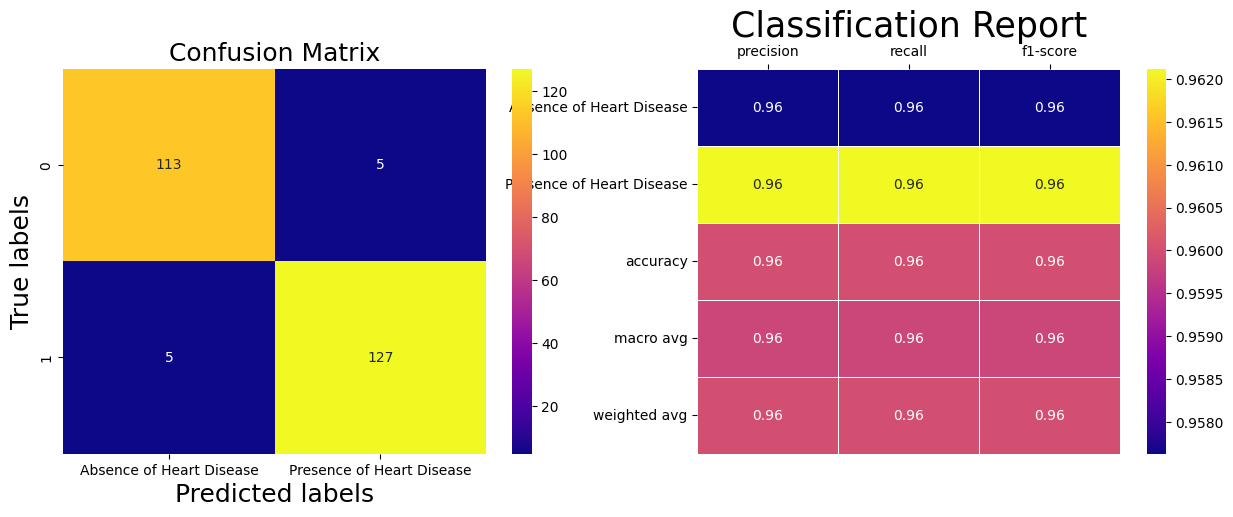

In [ ]:
clf_plot(y_pred_knn)

In [ ]:
# GuassianNB

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_score = round(gnb.score(X_test, y_test), 3)
print('GNB Score :', gnb_score)

GNB Score : 0.948


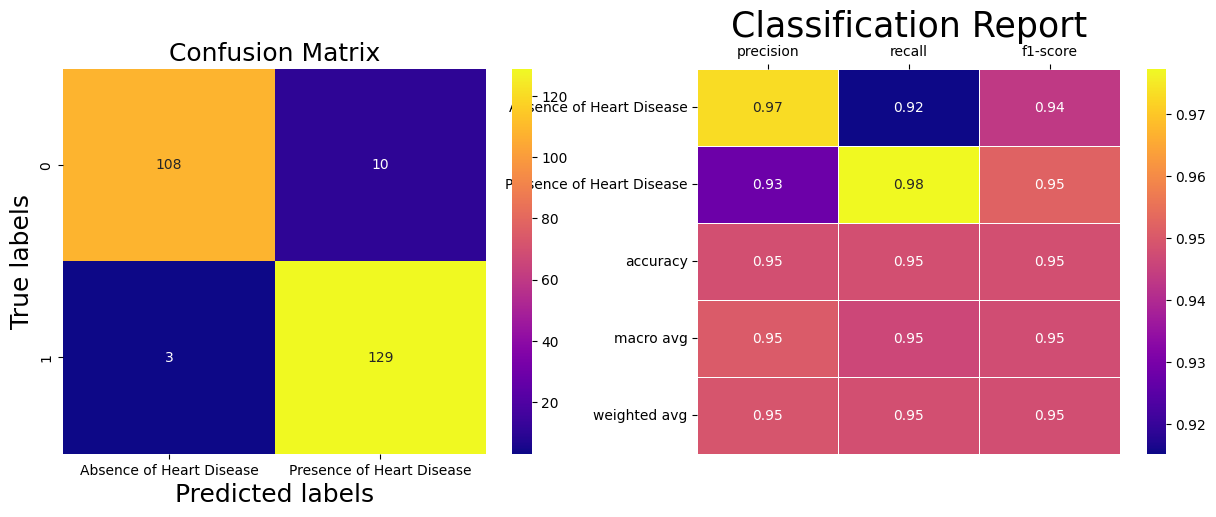

In [ ]:
clf_plot(y_pred_gnb)

In [ ]:
# Results

In [ ]:
result = pd.DataFrame({
    'Algorithm': ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score': [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [ ]:
sns.set_palette('plasma')

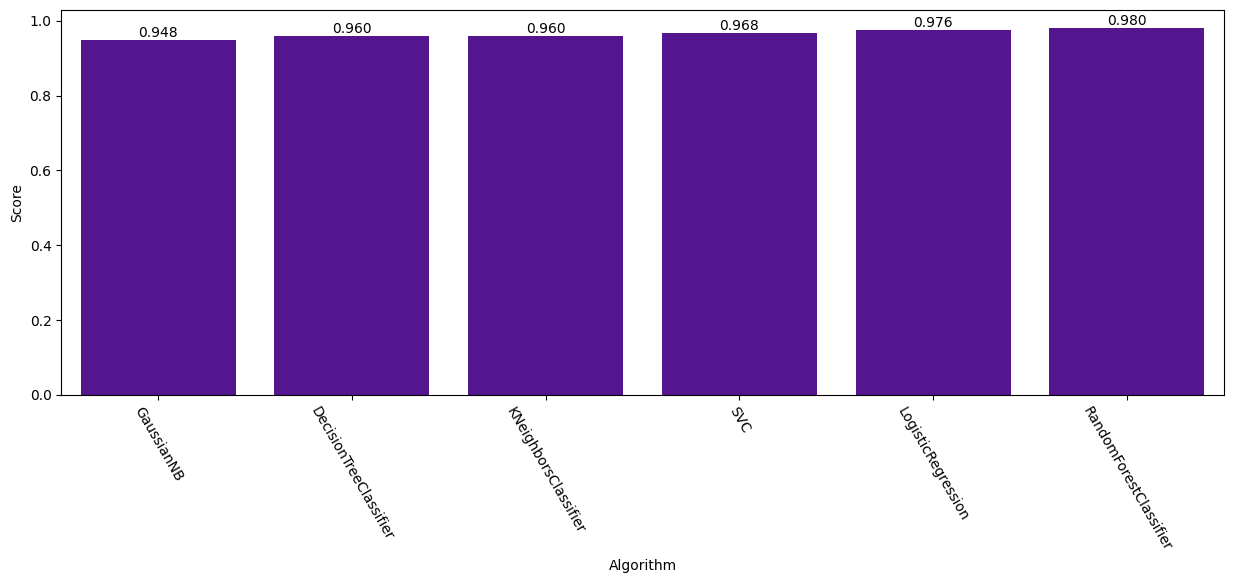

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

In [ ]:
# Final Modeling

In [ ]:
# Model
rf = RandomForestClassifier(**rf_cv.best_params_)

In [ ]:
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)

In [ ]:
X

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,0.000000,0.550000,1.0,0.666667,0.726415,0.000000,0.0,0.5,0.580153,0.0,0.854839,1.000000,1.000000
1,0.001606,0.333333,1.0,0.000000,0.000000,0.380399,0.0,0.5,0.335878,0.0,0.596774,0.333333,0.333333
2,0.001619,0.483333,1.0,0.666667,0.367925,0.235880,0.0,0.0,1.000000,1.0,0.806452,0.333333,0.000000
3,0.002948,0.383333,1.0,0.000000,0.415094,0.490033,1.0,0.5,0.625954,0.0,0.516129,0.666667,0.666667
4,0.004333,0.183333,1.0,0.333333,0.990566,0.000000,0.0,1.0,0.496183,0.0,0.854839,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.995822,0.466667,1.0,0.666667,0.424528,0.579734,0.0,1.0,0.854962,1.0,0.903226,0.666667,0.666667
996,0.996214,0.450000,1.0,1.000000,0.462264,0.428571,1.0,0.5,0.206107,1.0,0.919355,0.333333,0.000000
997,0.997472,0.816667,1.0,0.000000,0.584906,0.720930,1.0,0.0,0.954198,0.0,0.225806,1.000000,0.333333
998,0.999763,0.416667,1.0,0.333333,0.867925,0.692691,0.0,0.5,0.351145,1.0,0.951613,1.000000,0.666667


In [ ]:
y

,target
0,Presence of Heart Disease
1,Absence of Heart Disease
2,Absence of Heart Disease
3,Presence of Heart Disease
4,Presence of Heart Disease
...,...
995,Presence of Heart Disease
996,Absence of Heart Disease
997,Presence of Heart Disease
998,Presence of Heart Disease


In [ ]:
X.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope',
       'noofmajorvessels'],
      dtype='object')

In [ ]:
y

,target
0,Presence of Heart Disease
1,Absence of Heart Disease
2,Absence of Heart Disease
3,Presence of Heart Disease
4,Presence of Heart Disease
...,...
995,Presence of Heart Disease
996,Absence of Heart Disease
997,Presence of Heart Disease
998,Presence of Heart Disease


In [ ]:
# Save the Model
import pickle

with open('heart_disease_model.pkl', 'wb') as f:
  pickle.dump(rf, f)

print("Model Saved Successfully")

Model Saved Successfully


In [ ]:
# Load the model
with open('heart_disease_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

print("Model loaded Successfully!")

Model loaded Successfully!


In [ ]:
import pandas as pd

# Example input
new_data = pd.DataFrame([{
    'patientid': 1001,
    'age': 55,
    'gender': 1,
    'chestpain': 3,
    'restingBP': 140,
    'serumcholestrol': 250,
    'fastingbloodsugar': 0,
    'restingrelectro': 1,
    'maxheartrate': 160,
    'exerciseangia': 0,
    'oldpeak': 1.2,
    'slope': 2,
    'noofmajorvessels': 0
}])

prediction = loaded_model.predict(new_data)
label_map = {0: "Presence of Heart Disease", 1: "Absence of Heart Disease"}

print("Prediction:", prediction[0])


Prediction: Presence of Heart Disease


In [ ]:
import pandas as pd

new_data_no_disease = pd.DataFrame([{
    'patientid': 1192500 ,
    'age': 40,                 # Young age → low risk
    'gender': 1,               # Male (gender doesn't always mean high risk alone)
    'chestpain': 0,            # Typical angina (low risk type in dataset encoding)
    'restingBP': 94,          # Normal blood pressure
    'serumcholestrol': 229,    # Normal cholesterol level
    'fastingbloodsugar': 0,    # No high fasting blood sugar
    'restingrelectro': 1,      # Normal ECG
    'maxheartrate': 115,       # High achievable heart rate (good fitness)
    'exerciseangia': 0,        # No angina during exercise
    'oldpeak': 3.700000,            # No ST depression
    'slope': 1,                # Normal slope
    'noofmajorvessels': 1     # No major blocked vessels
}])

prediction = rf.predict(new_data_no_disease)
print("Prediction:", prediction[0])


Prediction: Presence of Heart Disease


In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

NameError: name 'accuracy_score' is not defined